In [40]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [41]:
df = pd.read_excel('BerlinPopulationFinal.xlsx')

In [42]:
data_demo = df.rename(columns={"Count": "Population"})

In [43]:
data_demo.head()

,Citizenship,Year,Sex,Age,District,Population
0,German,2019,male,below 10,Berlin,155868.0
1,German,2019,male,10 to 19,Berlin,132260.0
2,German,2019,male,20 to 29,Berlin,157631.0
3,German,2019,male,30 to 39,Berlin,227469.0
4,German,2019,male,40 to 49,Berlin,181662.0


In [44]:
# Get names of indexes for which column District has value Berlin
indexNames = data_demo[data_demo['District'] == "Berlin"].index

In [45]:
# Delete these row indexes from dataFrame
data_demo.drop(indexNames , inplace=True)

In [46]:
data_demo1 = data_demo.sort_values(['Year', 'District'], ascending=[True, True])
data_demo1

,Citizenship,Year,Sex,Age,District,Population
1300,German,2012,male,below 10,Charlottenburg-Wilmersdorf,10619.0
1301,German,2012,male,10 to 19,Charlottenburg-Wilmersdorf,9567.0
1302,German,2012,male,20 to 29,Charlottenburg-Wilmersdorf,13865.0
1303,German,2012,male,30 to 39,Charlottenburg-Wilmersdorf,13949.0
1304,German,2012,male,40 to 49,Charlottenburg-Wilmersdorf,18927.0
...,...,...,...,...,...,...
3055,Foreigner,2019,female,50 to 59,Treptow-Köpenick,1043.0
3056,Foreigner,2019,female,60 to 69,Treptow-Köpenick,421.0
3057,Foreigner,2019,female,70 to 79,Treptow-Köpenick,181.0
3058,Foreigner,2019,female,80 to 89,Treptow-Köpenick,55.0


In [47]:
population = data_demo1.groupby(["District", "Year"]).agg({"Population": "sum"}).reset_index()
population

,District,Year,Population
0,Charlottenburg-Wilmersdorf,2012,319289.0
1,Charlottenburg-Wilmersdorf,2013,322870.0
2,Charlottenburg-Wilmersdorf,2014,326354.0
3,Charlottenburg-Wilmersdorf,2015,330468.0
4,Charlottenburg-Wilmersdorf,2016,336249.0
...,...,...,...
91,Treptow-Köpenick,2015,253333.0
92,Treptow-Köpenick,2016,259524.0
93,Treptow-Köpenick,2017,264999.0
94,Treptow-Köpenick,2018,269775.0


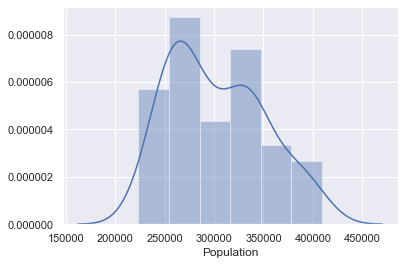

In [48]:
sns.distplot(population["Population"])

In [49]:
population_year = population.groupby("Year").agg({"Population": "sum"})

In [50]:
population_change = population_year.sort_values(by ="Year", ascending=True)["Population"].pct_change()

In [51]:
population_year.assign(population_change = population_year["Population"].pct_change())

,Population,population_change
Year,,
2012,3469621.0,NaN
2013,3517424.0,0.013778
2014,3562166.0,0.012720
2015,3610156.0,0.013472
2016,3670622.0,0.016749
2017,3711930.0,0.011254
2018,3748148.0,0.009757
2019,3769495.0,0.005695


In [52]:
pankow_population = population.loc[population["District"]=="Pankow"].reset_index()

In [53]:
pankow_change = pankow_population.sort_values(by ="Year", ascending=True)["Population"].pct_change()

In [54]:
pankow_population.assign(pankow_change = pankow_population["Population"].pct_change())

,index,District,Year,Population,pankow_change
0,48,Pankow,2012,370937.0,NaN
1,49,Pankow,2013,377532.0,0.017779
2,50,Pankow,2014,384367.0,0.018104
3,51,Pankow,2015,389976.0,0.014593
4,52,Pankow,2016,397406.0,0.019052
5,53,Pankow,2017,402289.0,0.012287
6,54,Pankow,2018,407039.0,0.011807
7,55,Pankow,2019,409335.0,0.005641


In [55]:
df = pd.read_csv('BerlinCrime.csv')
data_crime_real = df.drop(columns =['District', 'Code', 'Location'], axis=1)
#data_crime_real.head()
data_crime_real2 = data_crime_real.groupby('Year').sum()
data_crime_real2

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
Year,,,,,,,,,,,,,,,,
2012,6283,2886,42153,11032,14196,207340,5732,30503,25836,12285,2514,904,48582,11070,11687,101472
2013,6088,3135,41461,10247,14333,220417,6628,35652,26389,11563,2561,972,43176,9573,12746,101063
2014,5583,3228,39190,9515,13733,229955,6629,36032,30434,12149,2322,908,40678,8166,12878,97700
2015,5318,2914,39312,9664,13260,251366,6649,34741,31937,11805,2103,834,39841,8471,15176,100220
2016,5046,2962,41339,10024,13557,251192,7305,34515,34136,11487,2529,1032,41768,9015,14407,100073
2017,4165,2324,42283,10608,13452,220220,6642,32308,30082,8572,2210,872,40985,10428,15503,95027
2018,4202,2417,42828,10656,13965,209957,5671,28677,29978,7568,2334,886,39883,9103,16700,97763
2019,4395,2627,43035,10754,14604,200322,5751,25902,28456,7958,2616,1130,42986,9635,18334,101581


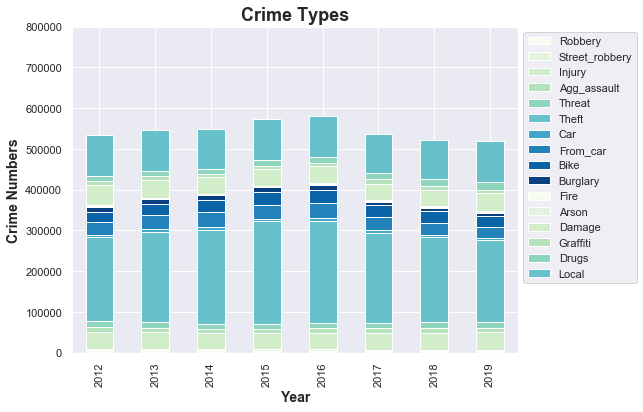

In [56]:
colors = plt.cm.GnBu(np.linspace(0, 1, 10))
ax = data_crime_real2.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors, legend=False);
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#ax.set_title('SELALES TITLE',fontsize=18,FontWeight = 'bold' )
ax.set_title("Crime Types", fontsize=18, fontweight="bold");
ax.set_ylim(0, 800000);
plt.xlabel('Year', fontsize=14, fontweight="bold");
plt.ylabel('Crime Numbers', fontsize=14, fontweight="bold");

In [57]:
#plotScatterMatrix(data_crime_real2, 20, 10)

In [58]:
total_crime_real = data_crime_real2.sum(axis=1).to_frame('total_crime')
total_crime_real2 = total_crime_real.assign(total_crime_change = total_crime_real.pct_change())
total_crime_real2 #.rename(columns={"";"test"})

,total_crime,total_crime_change
Year,,
2012,534475,NaN
2013,546004,0.021571
2014,549100,0.005670
2015,573611,0.044638
2016,580387,0.011813
2017,535681,-0.077028
2018,522588,-0.024442
2019,520086,-0.004788


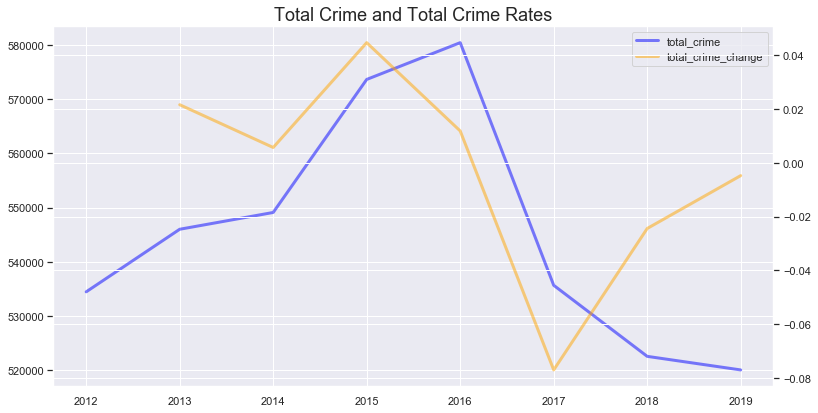

In [59]:
fig = plt.figure(figsize=(10, 5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()

# This is the magic that joins the x-axis
ax2 = ax1.twinx()
lns1 = ax1.plot(total_crime_real2['total_crime'], color='blue', lw=line_weight, alpha=alpha, label='total_crime')
lns2 = ax2.plot(total_crime_real2['total_crime_change'], color='orange', lw=line_weight, alpha=alpha, label='total_crime_change')


# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
plt.title('Total Crime and Total Crime Rates', fontsize=18)
        
plt.show()

In [60]:
df2 = pd.read_excel('BerlinCrime_frequency.xlsx')

In [61]:
data_crime = df2.rename(columns={"crime_hood\t":"local"}).drop(columns =['hood_id'], axis=1)
data_crime.head()

,year,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
0,2012,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


In [62]:
#CRIMES COMMITTED EACH YEARS
data_crime_y = data_crime.groupby('year').sum()
data_crime_y

,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,,,,,,,,,,,,,,,,
2012,24584,10457,172284,45185,59061,938794,23915,199371,109980,47407,12730,4898,198013,38755,42515,410546
2013,23722,12856,174749,44409,61717,957776,29096,191157,109401,44704,13203,5571,192251,31729,47537,416697
2014,18838,10420,154514,37550,54791,933584,25109,159349,116633,46190,8944,3751,174391,33778,47846,375301
2015,18076,9462,170097,41418,56235,970759,25709,142187,117782,46047,13183,7262,160347,33690,50248,407044
2016,16550,9459,161363,38955,52998,985404,26743,134606,126346,43083,13404,8182,160410,35193,48851,375110
2017,15343,8921,163324,39275,52693,824543,24082,130451,106092,33519,10336,5756,155435,40730,49507,356828
2018,23705,13257,181453,40904,57208,779481,22036,107786,108315,28374,15300,10235,155451,36532,53654,390919
2019,24245,17932,178768,46867,71936,775827,23404,110372,108055,30858,29384,23860,178732,42582,66040,426023


In [63]:
#TOTAL CRIME COMITTED EACH YEAR
total_crime = data_crime_y.sum(axis=1).to_frame('total_crime')
total_crime_year = total_crime.assign(total_crime_change = total_crime.pct_change())
total_crime_year #.rename(columns={"";"test"})

,total_crime,total_crime_change
year,,
2012,2338495,NaN
2013,2356575,0.007731
2014,2200989,-0.066022
2015,2269546,0.031148
2016,2236657,-0.014491
2017,2016835,-0.098281
2018,2024610,0.003855
2019,2154885,0.064346


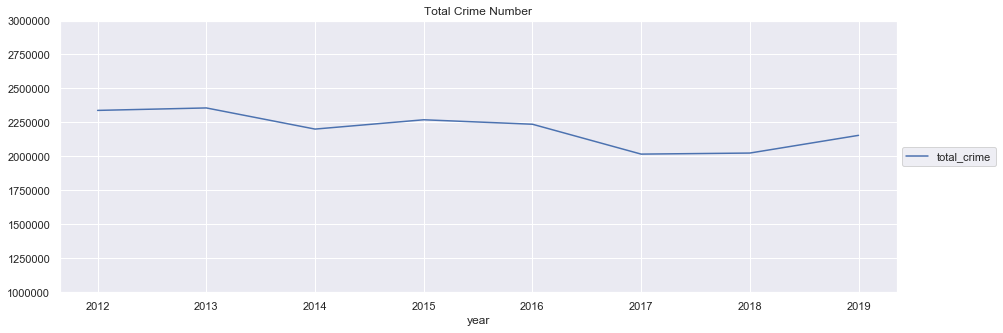

In [64]:
#total crime
sns.set()
ax = total_crime_year["total_crime"].plot(figsize=(15,5));
ax.set_ylim(1000000, 3000000);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_title("Total Crime Number");

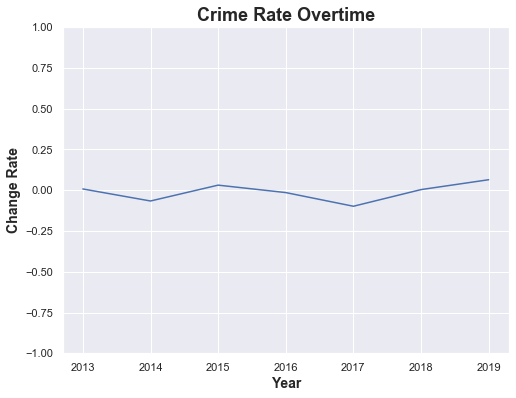

In [65]:
#total crime %
sns.set()
ax = total_crime_year["total_crime_change"].plot(figsize=(8,6));
ax.set_ylim(-1, 1);

#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_title("Crime Rate Overtime", fontsize=18, fontweight="bold");
plt.xlabel('Year', fontsize=14, fontweight="bold");
plt.ylabel('Change Rate', fontsize=14, fontweight="bold");
#fig.savefig('test.jpg');


In [66]:
#total crime in absolute number mostly not constant, slight increase seen by 2018
#total crime % same trend overall, that since 2013 there is no significant changes in crime rates

In [67]:
#total crime by type
data_crime_y

,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,,,,,,,,,,,,,,,,
2012,24584,10457,172284,45185,59061,938794,23915,199371,109980,47407,12730,4898,198013,38755,42515,410546
2013,23722,12856,174749,44409,61717,957776,29096,191157,109401,44704,13203,5571,192251,31729,47537,416697
2014,18838,10420,154514,37550,54791,933584,25109,159349,116633,46190,8944,3751,174391,33778,47846,375301
2015,18076,9462,170097,41418,56235,970759,25709,142187,117782,46047,13183,7262,160347,33690,50248,407044
2016,16550,9459,161363,38955,52998,985404,26743,134606,126346,43083,13404,8182,160410,35193,48851,375110
2017,15343,8921,163324,39275,52693,824543,24082,130451,106092,33519,10336,5756,155435,40730,49507,356828
2018,23705,13257,181453,40904,57208,779481,22036,107786,108315,28374,15300,10235,155451,36532,53654,390919
2019,24245,17932,178768,46867,71936,775827,23404,110372,108055,30858,29384,23860,178732,42582,66040,426023


In [68]:
data_crime_y.columns

Index(['robbery', 'street_robbery', 'injury', 'agg_assault', 'threat', 'theft',
       'car_theft', 'theft_from_car', 'bike_theft', 'burglary',
       'accidental_fire', 'arson', 'property_damage',
       'property_damage_graffiti', 'drugs', 'local'],
      dtype='object')

In [69]:
data_crime_y.describe()

,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,20632.875000,11595.500000,169569.000000,41820.375000,58329.875000,895771.00000,25011.750000,146909.87500,112825.500000,40022.75000,14560.500000,8689.375000,171878.750000,36623.625000,50774.75000,394808.500000
std,3818.214109,3010.649242,9206.557849,3325.596915,6273.615828,87640.54148,2193.535421,34173.90169,6867.462018,7765.47049,6303.094705,6457.804491,16716.490564,3772.522496,6909.49119,24133.698604
min,15343.000000,8921.000000,154514.000000,37550.000000,52693.000000,775827.00000,22036.000000,107786.00000,106092.000000,28374.00000,8944.000000,3751.000000,155435.000000,31729.000000,42515.00000,356828.000000
25%,17694.500000,9461.250000,162833.750000,39195.000000,54342.750000,813277.50000,23787.250000,125431.25000,108250.000000,32853.75000,12131.500000,5402.750000,159123.000000,33756.000000,47768.75000,375253.250000
50%,21271.500000,10438.500000,171190.500000,41161.000000,56721.500000,936189.00000,24595.500000,138396.50000,109690.500000,43893.50000,13193.000000,6509.000000,167400.500000,35862.500000,49179.00000,398981.500000
75%,23852.750000,12956.250000,175753.750000,44603.000000,59725.000000,961021.75000,25967.500000,167301.00000,116920.250000,46082.75000,13878.000000,8695.250000,182111.750000,39248.750000,51099.50000,412083.750000
max,24584.000000,17932.000000,181453.000000,46867.000000,71936.000000,985404.00000,29096.000000,199371.00000,126346.000000,47407.00000,29384.000000,23860.000000,198013.000000,42582.000000,66040.00000,426023.000000


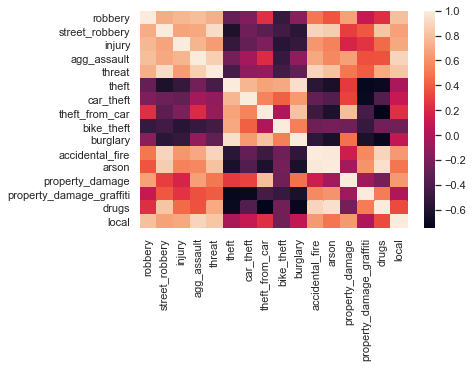

In [70]:
sns.heatmap(data_crime_y.corr());

In [71]:
trans = data_crime_y.transpose().reset_index()
trans = trans.rename(columns={"index":"crime_type"})
trans

year,crime_type,2012,2013,2014,2015,2016,2017,2018,2019
0,robbery,24584,23722,18838,18076,16550,15343,23705,24245
1,street_robbery,10457,12856,10420,9462,9459,8921,13257,17932
2,injury,172284,174749,154514,170097,161363,163324,181453,178768
3,agg_assault,45185,44409,37550,41418,38955,39275,40904,46867
4,threat,59061,61717,54791,56235,52998,52693,57208,71936
5,theft,938794,957776,933584,970759,985404,824543,779481,775827
6,car_theft,23915,29096,25109,25709,26743,24082,22036,23404
7,theft_from_car,199371,191157,159349,142187,134606,130451,107786,110372
8,bike_theft,109980,109401,116633,117782,126346,106092,108315,108055
9,burglary,47407,44704,46190,46047,43083,33519,28374,30858


In [72]:
trans.columns

Index(['crime_type', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='object', name='year')

In [73]:
#fig, ax = plt.subplots(figsize=(10,7))  
#
#months = trans['crime_type'].drop_duplicates()
#margin_bottom = np.zeros(len(trans['Year'].drop_duplicates()))
#colors = ["#006D2C", "#31A354","#74C476"]
#
#for num, month in enumerate(months):
#    values = list(trans[trans['Month'] == month].loc[:, 'Value'])
#
#    trans[trans['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
#                                    bottom = margin_bottom, color=colors[num], label=month)
#    margin_bottom += values
#
#plt.show()

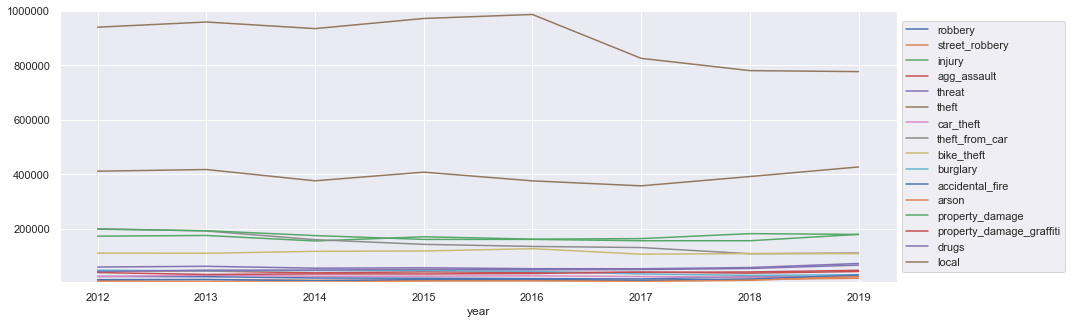

In [74]:
#plot total crime by type
ax = data_crime_y.plot(figsize=(15,5))
ax.set_ylim(3000, 1000000)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [75]:
#total crime by type %
crime_change = data_crime_y.pct_change()
crime_change

,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,,,,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,-0.035063,0.229416,0.014308,-0.017174,0.044970,0.020220,0.216642,-0.041200,-0.005265,-0.057017,0.037156,0.137403,-0.029099,-0.181293,0.118123,0.014982
2014,-0.205885,-0.189484,-0.115795,-0.154451,-0.112222,-0.025259,-0.137029,-0.166397,0.066105,0.033241,-0.322578,-0.326692,-0.092899,0.064578,0.006500,-0.099343
2015,-0.040450,-0.091939,0.100852,0.103009,0.026355,0.039820,0.023896,-0.107701,0.009851,-0.003096,0.473949,0.936017,-0.080532,-0.002605,0.050203,0.084580
2016,-0.084421,-0.000317,-0.051347,-0.059467,-0.057562,0.015086,0.040219,-0.053317,0.072711,-0.064369,0.016764,0.126687,0.000393,0.044613,-0.027802,-0.078453
2017,-0.072931,-0.056877,0.012153,0.008215,-0.005755,-0.163244,-0.099503,-0.030868,-0.160306,-0.221990,-0.228887,-0.296505,-0.031014,0.157332,0.013429,-0.048738
2018,0.545004,0.486044,0.111000,0.041477,0.085685,-0.054651,-0.084960,-0.173743,0.020954,-0.153495,0.480263,0.778145,0.000103,-0.103069,0.083766,0.095539
2019,0.022780,0.352644,-0.014797,0.145780,0.257447,-0.004688,0.062080,0.023992,-0.002400,0.087545,0.920523,1.331216,0.149764,0.165608,0.230850,0.089799


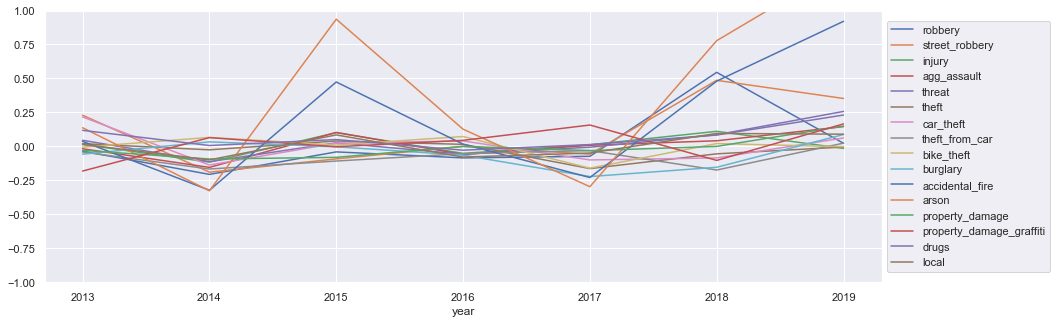

In [76]:
#plot total crime by type %
ax = crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

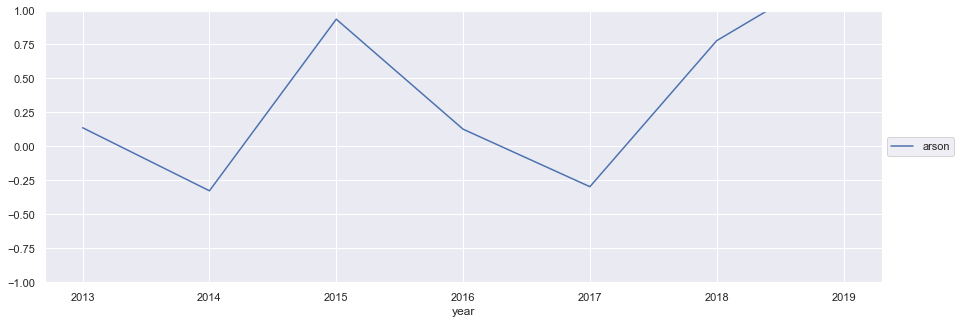

In [77]:
#plot total crime by type %
ax = crime_change["arson"].plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [167]:
#sns.lineplot(crime_change.year,crime_change.arson)

In [79]:
#most of the crimes 

In [80]:
data_crime.head()

,year,neighborhood,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
0,2012,Tiergarten Süd,Mitte,556,365,4651,1540,937,17960,143,2603,952,540,127,32,2167,206,1357,8190
1,2012,Regierungsviertel,Mitte,709,316,5171,1342,1549,34941,109,3349,1854,404,109,44,4145,1353,1069,9491
2,2012,Alexanderplatz,Mitte,513,288,3265,962,644,19045,172,1678,1742,583,104,57,3259,1106,922,6586
3,2012,Brunnenstraße Süd,Mitte,203,98,993,235,258,7494,336,751,1549,512,55,20,1674,477,833,2941
4,2012,Moabit West,Mitte,310,122,1502,442,475,5897,224,979,776,384,100,53,1232,153,618,3349


In [81]:
data_crime.district.unique()

array(['Mitte', 'FriedrichshainKreuzberg', 'Pankow',
       'CharlottenburgWilmersdorf', 'Spandau', 'SteglitzZehlendorf',
       'TempelhofSchöneberg', 'Neukölln', 'TreptowKöpenick',
       'MarzahnHellersdorf', 'Lichtenberg', 'Reinickendorf'], dtype=object)

In [83]:
#Mitte
mitte_crime = data_crime.loc[data_crime["district"]=="Mitte"].reset_index()
mitte_crime = mitte_crime.drop(columns=['index', 'neighborhood']).set_index('year')

In [144]:
mitte_crime_year = mitte_crime.groupby(["year", "district"]).sum()
mitte_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Mitte,3974,1964,25503,7443,7250,124079,1822,15105,10699,4986,1042,398,19396,4176,8828,52420
2013,Mitte,3525,1877,23749,6220,6929,137208,1966,16429,11732,4360,881,302,17630,4234,8057,50890
2014,Mitte,2984,1491,21845,5327,6365,144982,1430,12311,14945,4463,767,326,17206,4057,7976,48668
2015,Mitte,3177,1742,21503,5442,6133,157959,1349,14170,14498,3602,718,321,15723,3900,6820,44913
2016,Mitte,2974,1926,21622,5242,5943,154586,1382,13666,14517,3834,832,277,16054,3826,8326,45737
2017,Mitte,2089,1187,22069,5395,6434,129629,1271,12304,13291,2915,708,268,15900,4270,9361,45565
2018,Mitte,2034,1262,20846,5140,5600,112598,1183,9977,12566,2133,645,189,15761,4546,9844,42599
2019,Mitte,2033,1154,21095,5356,6149,107825,1057,9195,11828,2259,820,283,17889,4833,11009,45305


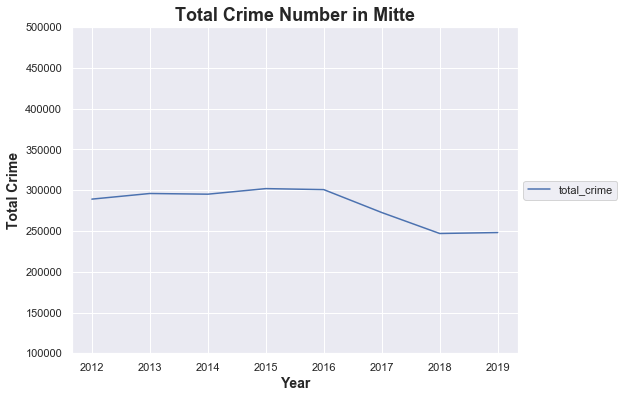

In [179]:
x = mitte_crime_year.reset_index()
y = x.drop(columns=["district"]).set_index('year').sum(axis=1).to_frame("total_crime")

sns.set()
ax = y["total_crime"].plot(figsize=(8,6));
ax.set_ylim(100000, 500000);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_title("Total Crime Number in Mitte", fontsize=18, fontweight="bold");

plt.xlabel('Year', fontsize=14, fontweight="bold");
plt.ylabel('Total Crime', fontsize=14, fontweight="bold");
#fig.savefig('test.jpg');


#246.923
#301.970

In [149]:
a= mitte_crime_year.reset_index()
a

,year,district,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
0,2012,Mitte,3974,1964,25503,7443,7250,124079,1822,15105,10699,4986,1042,398,19396,4176,8828,52420
1,2013,Mitte,3525,1877,23749,6220,6929,137208,1966,16429,11732,4360,881,302,17630,4234,8057,50890
2,2014,Mitte,2984,1491,21845,5327,6365,144982,1430,12311,14945,4463,767,326,17206,4057,7976,48668
3,2015,Mitte,3177,1742,21503,5442,6133,157959,1349,14170,14498,3602,718,321,15723,3900,6820,44913
4,2016,Mitte,2974,1926,21622,5242,5943,154586,1382,13666,14517,3834,832,277,16054,3826,8326,45737
5,2017,Mitte,2089,1187,22069,5395,6434,129629,1271,12304,13291,2915,708,268,15900,4270,9361,45565
6,2018,Mitte,2034,1262,20846,5140,5600,112598,1183,9977,12566,2133,645,189,15761,4546,9844,42599
7,2019,Mitte,2033,1154,21095,5356,6149,107825,1057,9195,11828,2259,820,283,17889,4833,11009,45305


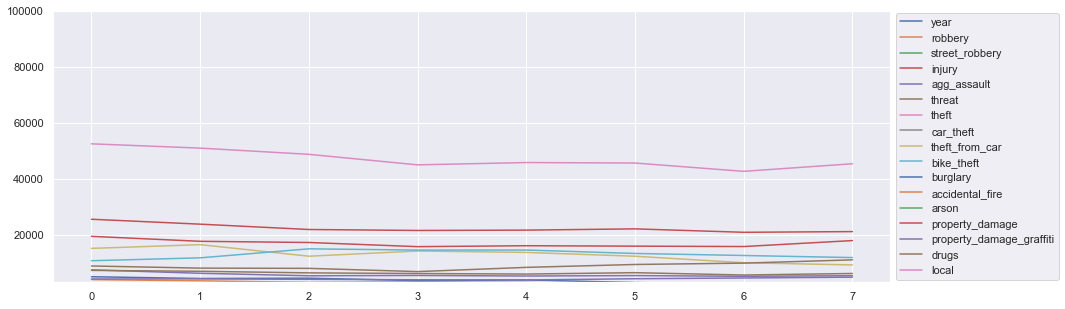

In [152]:
ax = a.plot(figsize=(15,5))
ax.set_ylim(3000, 100000)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#mitte_crime_change.plot(figsize=(15,15));

In [85]:
#Mitte %
mitte_crime_change = mitte_crime_year.pct_change()
mitte_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Mitte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Mitte,-0.112984,-0.044297,-0.068776,-0.164315,-0.044276,0.105812,0.079034,0.087653,0.096551,-0.125552,-0.154511,-0.241206,-0.091050,0.013889,-0.087336,-0.029187
2014,Mitte,-0.153475,-0.205647,-0.080172,-0.143569,-0.081397,0.056659,-0.272635,-0.250654,0.273866,0.023624,-0.129398,0.079470,-0.024050,-0.041804,-0.010053,-0.043663
2015,Mitte,0.064678,0.168343,-0.015656,0.021588,-0.036449,0.089508,-0.056643,0.151003,-0.029910,-0.192920,-0.063885,-0.015337,-0.086191,-0.038699,-0.144935,-0.077155
2016,Mitte,-0.063897,0.105626,0.005534,-0.036751,-0.030980,-0.021354,0.024463,-0.035568,0.001311,0.064409,0.158774,-0.137072,0.021052,-0.018974,0.220821,0.018347
2017,Mitte,-0.297579,-0.383697,0.020673,0.029187,0.082618,-0.161444,-0.080318,-0.099663,-0.084453,-0.239697,-0.149038,-0.032491,-0.009593,0.116048,0.124309,-0.003761
2018,Mitte,-0.026328,0.063184,-0.055417,-0.047266,-0.129624,-0.131383,-0.069237,-0.189125,-0.054548,-0.268268,-0.088983,-0.294776,-0.008742,0.064637,0.051597,-0.065094
2019,Mitte,-0.000492,-0.085578,0.011945,0.042023,0.098036,-0.042390,-0.106509,-0.078380,-0.058730,0.059072,0.271318,0.497354,0.135017,0.063132,0.118346,0.063523


In [136]:
mitte_crime_change.columns

Index(['robbery', 'street_robbery', 'injury', 'agg_assault', 'threat', 'theft',
       'car_theft', 'theft_from_car', 'bike_theft', 'burglary',
       'accidental_fire', 'arson', 'property_damage',
       'property_damage_graffiti', 'drugs', 'local'],
      dtype='object')

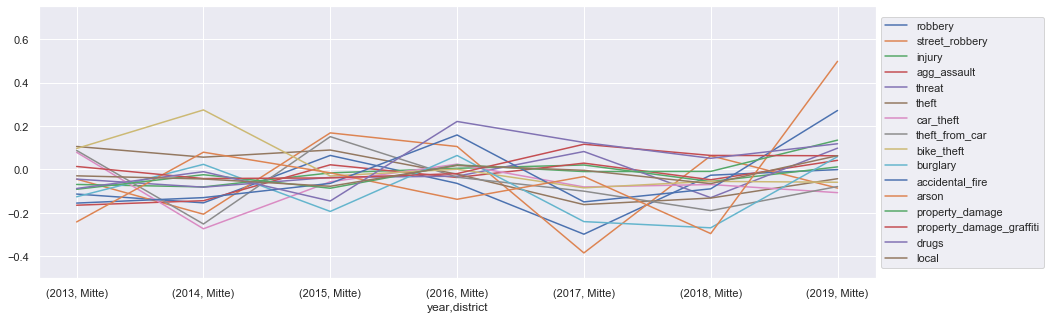

In [135]:
ax = mitte_crime_change.plot(figsize=(15,5))
ax.set_ylim(-0.50, 0.75)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#mitte_crime_change.plot(figsize=(15,15));

In [87]:
#FriedrichshainKreuzberg
fried_crime = data_crime.loc[data_crime["district"]=="FriedrichshainKreuzberg"].reset_index()
fried_crime = fried_crime.drop(columns=['index', 'neighborhood']).set_index('year')
fried_crime_year = fried_crime.groupby(["year", "district"]).sum()
fried_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,FriedrichshainKreuzberg,2632,1586,13112,3947,3366,64688,1378,7001,9565,3377,940,310,15471,2925,5495,31879
2013,FriedrichshainKreuzberg,2854,2024,13780,4244,3280,71841,1794,7528,10129,3043,786,252,14627,3036,7340,33134
2014,FriedrichshainKreuzberg,2594,1774,13889,4497,3425,81849,1389,8452,11831,2569,943,316,14613,3010,9397,32036
2015,FriedrichshainKreuzberg,2931,1629,13482,4361,3128,90746,1363,8780,11289,2431,680,274,13471,3741,16613,32160
2016,FriedrichshainKreuzberg,2662,1603,13018,4229,2945,82597,1293,8324,12367,2175,832,297,14983,4090,13341,32294
2017,FriedrichshainKreuzberg,1741,1094,12908,4527,3082,69281,1104,7855,10776,1784,548,206,13140,3907,13763,27950
2018,FriedrichshainKreuzberg,1765,1191,13379,4503,3151,65185,969,7162,11174,1799,531,165,12267,3148,13621,28159
2019,FriedrichshainKreuzberg,2484,1787,14489,5191,3460,72033,1083,5943,10808,1443,808,283,14453,3548,15609,35274


In [88]:
#FriedrichshainKreuzberg %
fried_crime_change = fried_crime_year.pct_change()
fried_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,FriedrichshainKreuzberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,FriedrichshainKreuzberg,0.084347,0.276166,0.050946,0.075247,-0.025550,0.110577,0.301887,0.075275,0.058965,-0.098904,-0.163830,-0.187097,-0.054554,0.037949,0.335760,0.039368
2014,FriedrichshainKreuzberg,-0.091100,-0.123518,0.007910,0.059614,0.044207,0.139308,-0.225753,0.122742,0.168032,-0.155767,0.199746,0.253968,-0.000957,-0.008564,0.280245,-0.033138
2015,FriedrichshainKreuzberg,0.129915,-0.081736,-0.029304,-0.030242,-0.086715,0.108700,-0.018719,0.038807,-0.045812,-0.053717,-0.278897,-0.132911,-0.078150,0.242857,0.767905,0.003871
2016,FriedrichshainKreuzberg,-0.091778,-0.015961,-0.034416,-0.030268,-0.058504,-0.089800,-0.051357,-0.051936,0.095491,-0.105306,0.223529,0.083942,0.112241,0.093291,-0.196954,0.004167
2017,FriedrichshainKreuzberg,-0.345980,-0.317530,-0.008450,0.070466,0.046520,-0.161217,-0.146172,-0.056343,-0.128649,-0.179770,-0.341346,-0.306397,-0.123006,-0.044743,0.031632,-0.134514
2018,FriedrichshainKreuzberg,0.013785,0.088665,0.036489,-0.005302,0.022388,-0.059122,-0.122283,-0.088224,0.036934,0.008408,-0.031022,-0.199029,-0.066438,-0.194267,-0.010318,0.007478
2019,FriedrichshainKreuzberg,0.407365,0.500420,0.082966,0.152787,0.098064,0.105055,0.117647,-0.170204,-0.032755,-0.197888,0.521657,0.715152,0.178202,0.127065,0.145951,0.252672


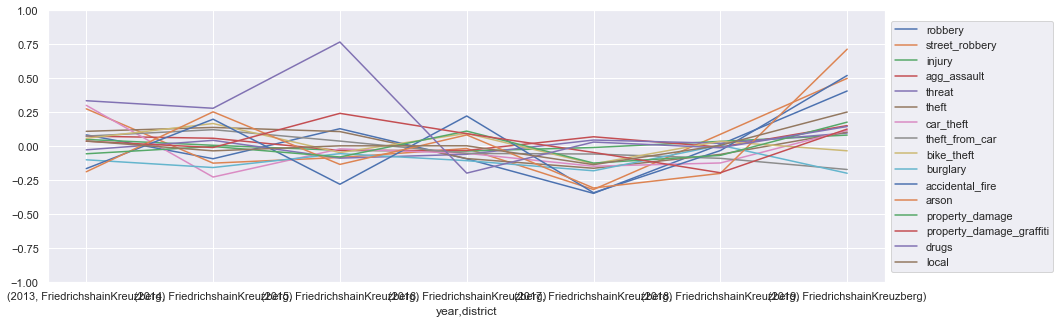

In [89]:
ax = fried_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [90]:
#Pankow
pankow_crime = data_crime.loc[data_crime["district"]=="Pankow"].reset_index()
pankow_crime = pankow_crime.drop(columns=['index', 'neighborhood']).set_index('year')
pankow_crime_year = pankow_crime.groupby(["year", "district"]).sum()
pankow_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Pankow,1764,697,11695,2867,4088,86793,3162,11537,17530,4745,942,356,19608,4810,2241,35004
2013,Pankow,1335,601,11441,2551,4436,86775,3535,13737,16895,4282,1045,526,16463,3864,2232,33930
2014,Pankow,1076,547,10568,2538,3975,87314,3083,12353,17584,4824,729,299,16360,4143,1818,33369
2015,Pankow,1037,477,10695,2477,3825,100690,2779,13114,17033,4470,815,325,16813,4933,1843,44157
2016,Pankow,1081,499,11008,2408,4119,90736,2655,11368,17524,5183,1053,425,16554,4943,2159,35741
2017,Pankow,1112,542,12122,3101,3840,74788,2112,10621,14759,3444,805,303,15748,5213,2413,32523
2018,Pankow,1148,591,11984,2862,3996,66289,2180,7728,15276,2861,773,282,14467,4132,2795,27586
2019,Pankow,1048,638,12504,2542,4592,65916,2347,7924,14621,3431,838,301,16709,4663,3056,31140


In [91]:
#Pankow %
pankow_crime_change = pankow_crime_year.pct_change()
pankow_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Pankow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Pankow,-0.243197,-0.137733,-0.021719,-0.110220,0.085127,-0.000207,0.117963,0.190691,-0.036224,-0.097576,0.109342,0.477528,-0.160394,-0.196674,-0.004016,-0.030682
2014,Pankow,-0.194007,-0.089850,-0.076305,-0.005096,-0.103922,0.006211,-0.127864,-0.100750,0.040781,0.126576,-0.302392,-0.431559,-0.006256,0.072205,-0.185484,-0.016534
2015,Pankow,-0.036245,-0.127971,0.012017,-0.024035,-0.037736,0.153194,-0.098605,0.061604,-0.031335,-0.073383,0.117970,0.086957,0.027689,0.190683,0.013751,0.323294
2016,Pankow,0.042430,0.046122,0.029266,-0.027856,0.076863,-0.098858,-0.044620,-0.133140,0.028826,0.159508,0.292025,0.307692,-0.015405,0.002027,0.171460,-0.190593
2017,Pankow,0.028677,0.086172,0.101199,0.287791,-0.067735,-0.175763,-0.204520,-0.065711,-0.157784,-0.335520,-0.235518,-0.287059,-0.048689,0.054623,0.117647,-0.090037
2018,Pankow,0.032374,0.090406,-0.011384,-0.077072,0.040625,-0.113641,0.032197,-0.272385,0.035029,-0.169280,-0.039752,-0.069307,-0.081344,-0.207366,0.158309,-0.151800
2019,Pankow,-0.087108,0.079526,0.043391,-0.111810,0.149149,-0.005627,0.076606,0.025362,-0.042878,0.199231,0.084088,0.067376,0.154973,0.128509,0.093381,0.128833


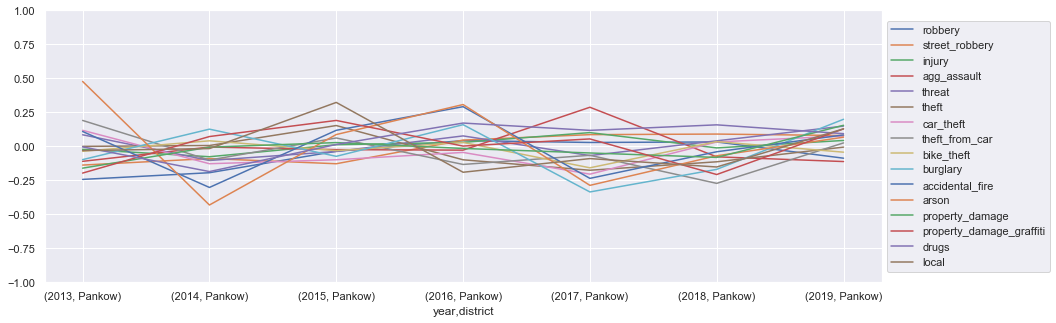

In [92]:
ax = pankow_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [93]:
#CharlottenburgWilmersdorf
charlo_crime = data_crime.loc[data_crime["district"]=="CharlottenburgWilmersdorf"].reset_index()
charlo_crime = charlo_crime.drop(columns=['index', 'neighborhood']).set_index('year')
charlo_crime_year = charlo_crime.groupby(["year", "district"]).sum()
charlo_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,CharlottenburgWilmersdorf,4696,1326,35482,10445,12420,247053,4976,94271,22033,7911,3338,1559,33432,4480,5646,79142
2013,CharlottenburgWilmersdorf,4744,2792,41482,12397,14644,225146,6507,70358,19946,8513,3507,1694,47180,3373,8947,88997
2014,CharlottenburgWilmersdorf,3070,1556,28629,7778,11469,192473,3519,45125,18458,8904,597,274,34906,5248,10199,65598
2015,CharlottenburgWilmersdorf,2545,1299,45144,11325,14508,194341,4864,38955,18841,8050,6020,4294,28554,3976,4322,91733
2016,CharlottenburgWilmersdorf,2424,1290,32983,8536,10919,221157,3392,34938,18807,5538,5149,4708,27172,5250,6637,65224
2017,CharlottenburgWilmersdorf,3162,2231,32466,7190,11521,164939,3890,35847,14693,6063,3439,3038,23114,4573,4431,66557
2018,CharlottenburgWilmersdorf,11557,6388,50100,9100,14644,163469,4466,24189,16760,4561,7804,7344,28964,6510,4946,101295
2019,CharlottenburgWilmersdorf,11022,9986,45711,13733,26435,163125,4274,32340,18441,6777,20366,19901,40832,11527,11813,115236


In [94]:
#CharlottenburgWilmersdorf %
charlo_crime_change = charlo_crime_year.pct_change()
charlo_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,CharlottenburgWilmersdorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,CharlottenburgWilmersdorf,0.010221,1.105581,0.169100,0.186884,0.179066,-0.088673,0.307677,-0.253662,-0.094722,0.076097,0.050629,0.086594,0.411223,-0.247098,0.584662,0.124523
2014,CharlottenburgWilmersdorf,-0.352867,-0.442693,-0.309845,-0.372590,-0.216812,-0.145119,-0.459198,-0.358637,-0.074601,0.045930,-0.829769,-0.838253,-0.260153,0.555885,0.139935,-0.262919
2015,CharlottenburgWilmersdorf,-0.171010,-0.165167,0.576863,0.456030,0.264975,0.009705,0.382211,-0.136731,0.020750,-0.095912,9.083752,14.671533,-0.181974,-0.242378,-0.576233,0.398412
2016,CharlottenburgWilmersdorf,-0.047544,-0.006928,-0.269382,-0.246269,-0.247381,0.137984,-0.302632,-0.103119,-0.001805,-0.312050,-0.144684,0.096414,-0.048400,0.320423,0.535632,-0.288980
2017,CharlottenburgWilmersdorf,0.304455,0.729457,-0.015675,-0.157685,0.055133,-0.254200,0.146816,0.026018,-0.218748,0.094800,-0.332103,-0.354715,-0.149345,-0.128952,-0.332379,0.020437
2018,CharlottenburgWilmersdorf,2.654965,1.863290,0.543153,0.265647,0.271070,-0.008912,0.148072,-0.325215,0.140679,-0.247732,1.269264,1.417380,0.253093,0.423573,0.116227,0.521929
2019,CharlottenburgWilmersdorf,-0.046292,0.563244,-0.087605,0.509121,0.805176,-0.002104,-0.042991,0.336971,0.100298,0.485858,1.609687,1.709831,0.409750,0.770661,1.388395,0.137628


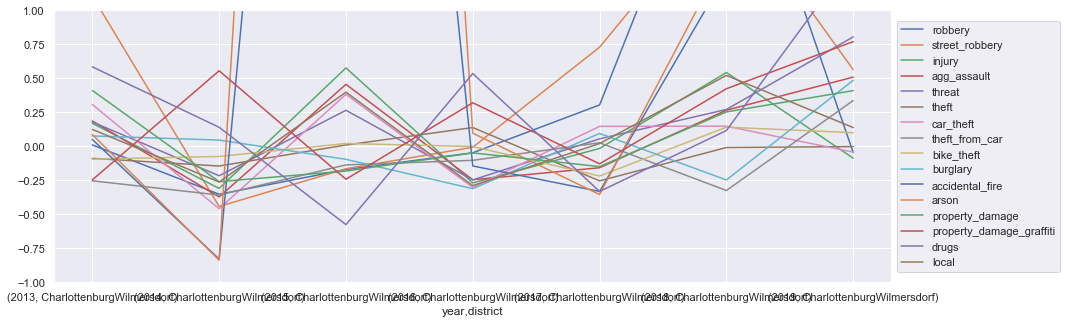

In [95]:
ax = charlo_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [96]:
#Spandau
spandau_crime = data_crime.loc[data_crime["district"]=="Spandau"].reset_index()
spandau_crime = spandau_crime.drop(columns=['index', 'neighborhood']).set_index('year')
spandau_crime_year = spandau_crime.groupby(["year", "district"]).sum()
spandau_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Spandau,1460,560,10909,2613,4193,45248,1217,6668,4285,2551,685,230,12263,1490,1807,28319
2013,Spandau,1101,525,10447,2482,4097,46657,1291,7163,3730,2512,661,188,11080,1513,1817,28385
2014,Spandau,1194,618,9960,2274,3586,44278,1336,7609,4320,2215,684,289,9272,1245,1708,23606
2015,Spandau,944,456,9435,2021,3843,45233,1508,6711,3515,2344,610,259,8182,1177,1451,24323
2016,Spandau,862,480,10043,2247,3622,43175,1196,6223,3773,2599,628,251,8380,1111,1476,22223
2017,Spandau,853,461,10096,2500,3287,39775,1194,5988,4554,2370,514,239,8059,1425,1563,20765
2018,Spandau,1006,549,10414,2433,3598,38665,1372,5932,4473,1497,562,240,7690,961,1792,22627
2019,Spandau,749,345,9364,2089,3724,35292,1640,5270,3482,1629,686,362,8327,922,2020,20896


In [97]:
#Spandau %
spandau_crime_change = spandau_crime_year.pct_change()
spandau_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Spandau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Spandau,-0.245890,-0.062500,-0.042350,-0.050134,-0.022895,0.031139,0.060805,0.074235,-0.129522,-0.015288,-0.035036,-0.182609,-0.096469,0.015436,0.005534,0.002331
2014,Spandau,0.084469,0.177143,-0.046616,-0.083803,-0.124725,-0.050989,0.034857,0.062264,0.158177,-0.118232,0.034796,0.537234,-0.163177,-0.177132,-0.059989,-0.168364
2015,Spandau,-0.209380,-0.262136,-0.052711,-0.111258,0.071668,0.021568,0.128743,-0.118018,-0.186343,0.058239,-0.108187,-0.103806,-0.117558,-0.054618,-0.150468,0.030374
2016,Spandau,-0.086864,0.052632,0.064441,0.111826,-0.057507,-0.045498,-0.206897,-0.072716,0.073400,0.108788,0.029508,-0.030888,0.024199,-0.056075,0.017229,-0.086338
2017,Spandau,-0.010441,-0.039583,0.005277,0.112595,-0.092490,-0.078749,-0.001672,-0.037763,0.206997,-0.088111,-0.181529,-0.047809,-0.038305,0.282628,0.058943,-0.065608
2018,Spandau,0.179367,0.190889,0.031498,-0.026800,0.094615,-0.027907,0.149079,-0.009352,-0.017787,-0.368354,0.093385,0.004184,-0.045787,-0.325614,0.146513,0.089670
2019,Spandau,-0.255467,-0.371585,-0.100826,-0.141389,0.035019,-0.087237,0.195335,-0.111598,-0.221552,0.088176,0.220641,0.508333,0.082835,-0.040583,0.127232,-0.076502


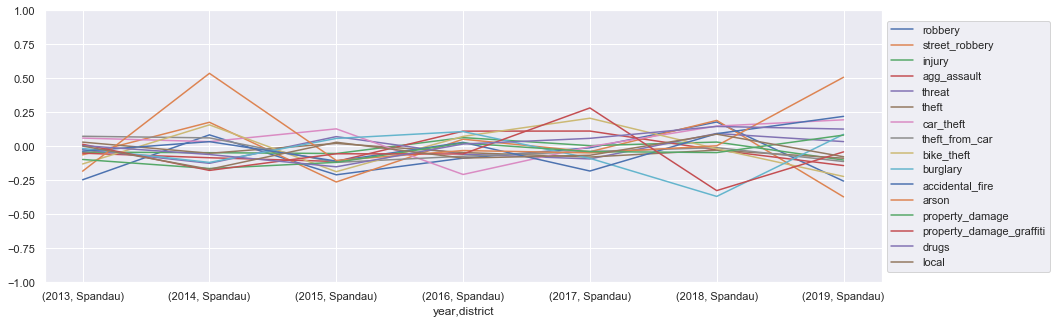

In [98]:
ax = spandau_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [99]:
#SteglitzZehlendorf
steglit_crime = data_crime.loc[data_crime["district"]=="SteglitzZehlendorf"].reset_index()
steglit_crime = steglit_crime.drop(columns=['index', 'neighborhood']).set_index('year')
steglit_crime_year = steglit_crime.groupby(["year", "district"]).sum()
steglit_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,SteglitzZehlendorf,853,336,4870,976,2246,36468,1256,6655,4441,2683,337,104,7929,1614,873,13225
2013,SteglitzZehlendorf,867,382,4914,911,2313,42075,1431,9027,4562,3509,345,108,6482,1343,1168,13792
2014,SteglitzZehlendorf,600,315,4306,860,2085,37962,1562,7440,5020,3847,370,129,7273,1726,1090,12681
2015,SteglitzZehlendorf,473,256,4406,891,1920,38950,1258,6585,6633,3464,227,85,6620,1642,900,12013
2016,SteglitzZehlendorf,450,243,4710,954,1949,39218,1513,6696,6981,3075,341,151,6650,1286,922,12091
2017,SteglitzZehlendorf,411,202,4413,880,2091,32680,1205,4761,6051,2031,440,141,6852,1873,942,11148
2018,SteglitzZehlendorf,366,176,4930,994,2044,32213,834,5666,5653,1708,413,145,6480,1733,1169,11672
2019,SteglitzZehlendorf,621,370,5076,999,2283,32556,1063,5000,6133,2046,576,200,7377,2190,1159,13036


In [100]:
#SteglitzZehlendorf %
steglit_crime_change = steglit_crime_year.pct_change()
steglit_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,SteglitzZehlendorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,SteglitzZehlendorf,0.016413,0.136905,0.009035,-0.066598,0.029831,0.153751,0.139331,0.356424,0.027246,0.307864,0.023739,0.038462,-0.182495,-0.167906,0.337915,0.042873
2014,SteglitzZehlendorf,-0.307958,-0.175393,-0.123728,-0.055982,-0.098573,-0.097754,0.091544,-0.175806,0.100395,0.096324,0.072464,0.194444,0.122030,0.285182,-0.066781,-0.080554
2015,SteglitzZehlendorf,-0.211667,-0.187302,0.023223,0.036047,-0.079137,0.026026,-0.194622,-0.114919,0.321315,-0.099558,-0.386486,-0.341085,-0.089784,-0.048667,-0.174312,-0.052677
2016,SteglitzZehlendorf,-0.048626,-0.050781,0.068997,0.070707,0.015104,0.006881,0.202703,0.016856,0.052465,-0.112298,0.502203,0.776471,0.004532,-0.216809,0.024444,0.006493
2017,SteglitzZehlendorf,-0.086667,-0.168724,-0.063057,-0.077568,0.072858,-0.166709,-0.203569,-0.288978,-0.133219,-0.339512,0.290323,-0.066225,0.030376,0.456454,0.021692,-0.077992
2018,SteglitzZehlendorf,-0.109489,-0.128713,0.117154,0.129545,-0.022477,-0.014290,-0.307884,0.190086,-0.065774,-0.159035,-0.061364,0.028369,-0.054291,-0.074746,0.240977,0.047004
2019,SteglitzZehlendorf,0.696721,1.102273,0.029615,0.005030,0.116928,0.010648,0.274580,-0.117543,0.084911,0.197892,0.394673,0.379310,0.138426,0.263705,-0.008554,0.116861


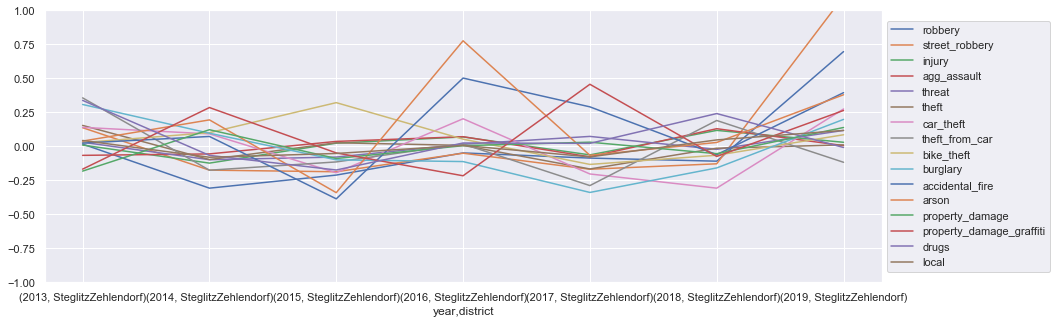

In [101]:
ax = steglit_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [102]:
#TempelhofSchöneberg
tempel_crime = data_crime.loc[data_crime["district"]=="TempelhofSchöneberg"].reset_index()
tempel_crime = tempel_crime.drop(columns=['index', 'neighborhood']).set_index('year')
tempel_crime_year = tempel_crime.groupby(["year", "district"]).sum()
tempel_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,TempelhofSchöneberg,1129,502,6609,1490,2672,36162,1080,6177,4610,2361,438,142,7910,1505,2132,17151
2013,TempelhofSchöneberg,1252,601,6816,1664,2631,38613,1058,6747,4534,2151,490,137,7016,1255,2277,17455
2014,TempelhofSchöneberg,939,567,6353,1442,2498,38270,999,6541,5086,2312,441,157,6923,1283,2209,16292
2015,TempelhofSchöneberg,802,457,6190,1392,2304,39685,1118,5696,5707,2181,338,118,6572,1142,1732,15720
2016,TempelhofSchöneberg,758,452,6413,1344,2160,39187,1392,5791,5810,1970,429,174,6577,1148,1963,15538
2017,TempelhofSchöneberg,673,339,6227,1392,2179,36013,1065,5554,5260,1435,407,166,6246,1221,2052,14701
2018,TempelhofSchöneberg,622,330,6253,1522,2246,38746,780,5040,5077,1477,367,149,6576,1563,2578,19087
2019,TempelhofSchöneberg,676,391,6511,1491,2660,34035,918,4931,4903,1506,427,179,6972,1766,2281,17101


In [103]:
#TempelhofSchöneberg %
tempel_crime_change = tempel_crime_year.pct_change()
tempel_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,TempelhofSchöneberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,TempelhofSchöneberg,0.108946,0.197211,0.031321,0.116779,-0.015344,0.067778,-0.020370,0.092278,-0.016486,-0.088945,0.118721,-0.035211,-0.113021,-0.166113,0.068011,0.017725
2014,TempelhofSchöneberg,-0.250000,-0.056572,-0.067928,-0.133413,-0.050551,-0.008883,-0.055766,-0.030532,0.121747,0.074849,-0.100000,0.145985,-0.013255,0.022311,-0.029864,-0.066628
2015,TempelhofSchöneberg,-0.145900,-0.194004,-0.025657,-0.034674,-0.077662,0.036974,0.119119,-0.129185,0.122100,-0.056661,-0.233560,-0.248408,-0.050701,-0.109899,-0.215935,-0.035109
2016,TempelhofSchöneberg,-0.054863,-0.010941,0.036026,-0.034483,-0.062500,-0.012549,0.245081,0.016678,0.018048,-0.096745,0.269231,0.474576,0.000761,0.005254,0.133372,-0.011578
2017,TempelhofSchöneberg,-0.112137,-0.250000,-0.029004,0.035714,0.008796,-0.080996,-0.234914,-0.040926,-0.094664,-0.271574,-0.051282,-0.045977,-0.050327,0.063589,0.045339,-0.053868
2018,TempelhofSchöneberg,-0.075780,-0.026549,0.004175,0.093391,0.030748,0.075889,-0.267606,-0.092546,-0.034791,0.029268,-0.098280,-0.102410,0.052834,0.280098,0.256335,0.298347
2019,TempelhofSchöneberg,0.086817,0.184848,0.041260,-0.020368,0.184328,-0.121587,0.176923,-0.021627,-0.034272,0.019634,0.163488,0.201342,0.060219,0.129878,-0.115206,-0.104050


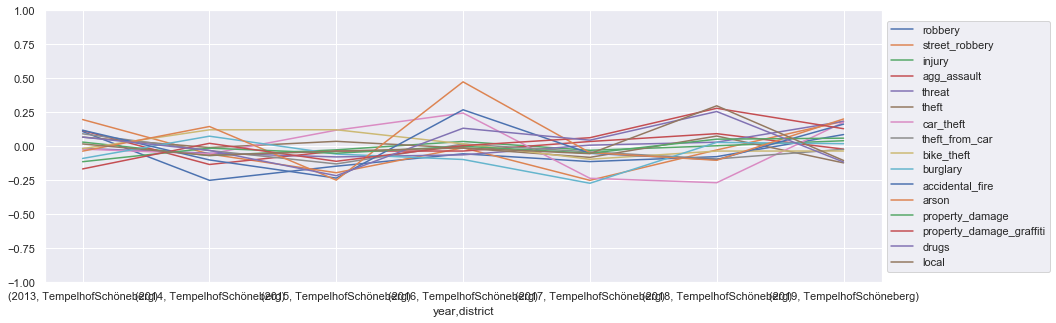

In [104]:
ax = tempel_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [105]:
#Neukölln
neuko_crime = data_crime.loc[data_crime["district"]=="Neukölln"].reset_index()
neuko_crime = neuko_crime.drop(columns=['index', 'neighborhood']).set_index('year')
neuko_crime_year = neuko_crime.groupby(["year", "district"]).sum()
neuko_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Neukölln,2344,1118,13466,3838,5153,59778,1339,9545,4190,4355,772,284,14163,2361,4901,35145
2013,Neukölln,2340,1246,13273,3809,5280,65186,1948,12313,4592,3683,934,340,15997,2072,5005,34890
2014,Neukölln,1592,834,11792,3047,4352,58293,1557,10889,4771,3969,736,349,13896,2179,3439,28454
2015,Neukölln,1651,886,11452,2975,4146,62906,1676,10001,6542,3567,776,366,12852,1908,4915,29544
2016,Neukölln,1376,739,12089,3446,4256,65642,1975,9692,6084,3738,709,350,12231,1797,3250,32363
2017,Neukölln,1350,692,11609,3341,4021,59451,1849,9813,6022,2825,725,325,10965,1893,3660,29706
2018,Neukölln,1442,766,12009,3351,4221,57255,1467,10272,5142,2163,774,354,11797,1724,4639,29663
2019,Neukölln,1439,784,12168,3573,4519,57495,1218,9085,6246,2747,710,393,11942,1518,6061,31936


In [106]:
#Neukölln %
neuko_crime_change = neuko_crime_year.pct_change()
neuko_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Neukölln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Neukölln,-0.001706,0.114490,-0.014332,-0.007556,0.024646,0.090468,0.454817,0.289995,0.095943,-0.154305,0.209845,0.197183,0.129492,-0.122406,0.021220,-0.007256
2014,Neukölln,-0.319658,-0.330658,-0.111580,-0.200053,-0.175758,-0.105744,-0.200719,-0.115650,0.038981,0.077654,-0.211991,0.026471,-0.131337,0.051641,-0.312887,-0.184465
2015,Neukölln,0.037060,0.062350,-0.028833,-0.023630,-0.047335,0.079135,0.076429,-0.081550,0.371201,-0.101285,0.054348,0.048711,-0.075130,-0.124369,0.429195,0.038307
2016,Neukölln,-0.166566,-0.165914,0.055623,0.158319,0.026532,0.043493,0.178401,-0.030897,-0.070009,0.047939,-0.086340,-0.043716,-0.048319,-0.058176,-0.338759,0.095417
2017,Neukölln,-0.018895,-0.063599,-0.039706,-0.030470,-0.055216,-0.094315,-0.063797,0.012485,-0.010191,-0.244248,0.022567,-0.071429,-0.103507,0.053422,0.126154,-0.082100
2018,Neukölln,0.068148,0.106936,0.034456,0.002993,0.049739,-0.036938,-0.206598,0.046775,-0.146131,-0.234336,0.067586,0.089231,0.075878,-0.089276,0.267486,-0.001448
2019,Neukölln,-0.002080,0.023499,0.013240,0.066249,0.070599,0.004192,-0.169734,-0.115557,0.214702,0.269995,-0.082687,0.110169,0.012291,-0.119490,0.306532,0.076627


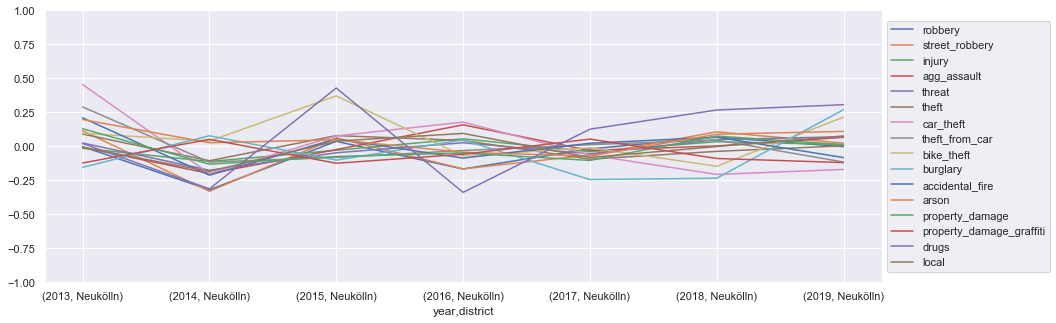

In [107]:
ax = neuko_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [108]:
#TreptowKöpenick
trepto_crime = data_crime.loc[data_crime["district"]=="TreptowKöpenick"].reset_index()
trepto_crime = trepto_crime.drop(columns=['index', 'neighborhood']).set_index('year')
trepto_crime_year = trepto_crime.groupby(["year", "district"]).sum()
trepto_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,TreptowKöpenick,1771,725,14729,3255,5133,81467,2477,13461,13868,4909,1179,508,24668,6312,2489,35939
2013,TreptowKöpenick,1602,813,15064,3087,5919,86612,3722,18134,15937,3751,1338,627,20258,4606,2657,35784
2014,TreptowKöpenick,1496,908,14673,3030,5490,94748,3993,20026,16140,4055,1144,600,21279,4680,3000,37242
2015,TreptowKöpenick,1425,727,14975,3484,5709,90716,3309,12699,16261,5932,1170,596,18764,3636,4103,37942
2016,TreptowKöpenick,1032,588,15685,3316,5310,91980,4698,12003,20303,5300,1152,581,17796,3790,2773,36812
2017,TreptowKöpenick,1395,786,16863,3564,5355,81079,4322,14172,14407,3197,736,343,22248,7757,3471,36500
2018,TreptowKöpenick,1480,798,16574,3415,5640,78236,2935,11633,15623,3526,1240,558,19421,5442,4159,36624
2019,TreptowKöpenick,1214,722,17529,4083,6183,79364,3833,11437,15785,3171,1723,934,21422,5174,4693,41894


In [109]:
#TreptowKöpenick %
trepto_crime_change = trepto_crime_year.pct_change()
trepto_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,TreptowKöpenick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,TreptowKöpenick,-0.095426,0.121379,0.022744,-0.051613,0.153127,0.063154,0.502624,0.347151,0.149192,-0.235893,0.134860,0.234252,-0.178774,-0.270279,0.067497,-0.004313
2014,TreptowKöpenick,-0.066167,0.116851,-0.025956,-0.018465,-0.072478,0.093936,0.072810,0.104334,0.012738,0.081045,-0.144993,-0.043062,0.050400,0.016066,0.129093,0.040744
2015,TreptowKöpenick,-0.047460,-0.199339,0.020582,0.149835,0.039891,-0.042555,-0.171300,-0.365874,0.007497,0.462885,0.022727,-0.006667,-0.118192,-0.223077,0.367667,0.018796
2016,TreptowKöpenick,-0.275789,-0.191197,0.047412,-0.048220,-0.069890,0.013934,0.419764,-0.054807,0.248570,-0.106541,-0.015385,-0.025168,-0.051588,0.042354,-0.324153,-0.029782
2017,TreptowKöpenick,0.351744,0.336735,0.075104,0.074789,0.008475,-0.118515,-0.080034,0.180705,-0.290400,-0.396792,-0.361111,-0.409639,0.250169,1.046702,0.251713,-0.008475
2018,TreptowKöpenick,0.060932,0.015267,-0.017138,-0.041807,0.053221,-0.035065,-0.320916,-0.179156,0.084403,0.102909,0.684783,0.626822,-0.127068,-0.298440,0.198214,0.003397
2019,TreptowKöpenick,-0.179730,-0.095238,0.057620,0.195608,0.096277,0.014418,0.305963,-0.016849,0.010369,-0.100681,0.389516,0.673835,0.103033,-0.049247,0.128396,0.143895


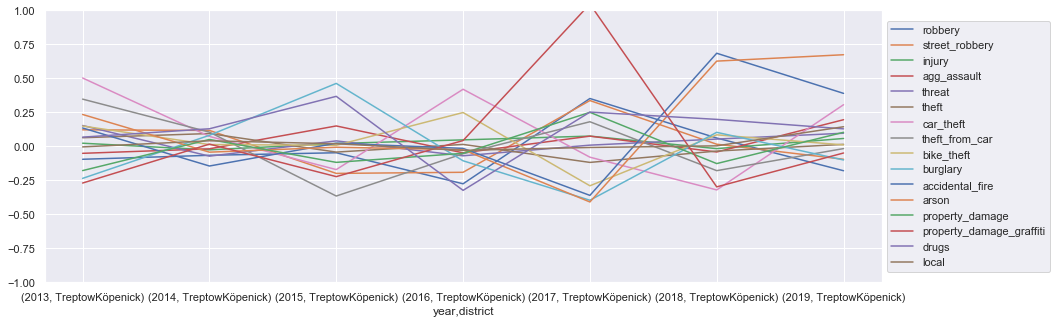

In [110]:
ax = trepto_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [111]:
#MarzahnHellersdorf
marzah_crime = data_crime.loc[data_crime["district"]=="MarzahnHellersdorf"].reset_index()
marzah_crime = marzah_crime.drop(columns=['index', 'neighborhood']).set_index('year')
marzah_crime_year = marzah_crime.groupby(["year", "district"]).sum()
marzah_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,MarzahnHellersdorf,1105,500,10316,2125,3245,32500,1460,5924,4037,1765,837,245,11819,2637,1040,21314
2013,MarzahnHellersdorf,1087,552,10198,1960,3330,32699,1617,6911,4133,1620,822,285,9238,1790,1096,20747
2014,MarzahnHellersdorf,773,449,9883,1738,3077,32262,1535,6106,4145,1471,549,202,8701,1462,1145,20564
2015,MarzahnHellersdorf,661,358,9138,1636,2880,31466,1838,6185,3584,2523,612,147,8639,1569,1249,18429
2016,MarzahnHellersdorf,717,427,9661,1694,2949,33072,2023,5837,3825,2359,658,209,9469,2078,1152,19877
2017,MarzahnHellersdorf,637,335,10281,1757,2761,30647,2000,5107,3598,1629,450,142,9323,2592,1093,20205
2018,MarzahnHellersdorf,522,302,9839,1804,3055,26593,1658,4175,3535,1269,770,227,9226,1934,1547,18798
2019,MarzahnHellersdorf,767,483,9551,1847,2954,27333,1836,4232,2832,1162,778,301,8677,1548,1686,19045


In [112]:
#MarzahnHellersdorf %
marzah_crime_change = marzah_crime_year.pct_change()
marzah_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,MarzahnHellersdorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,MarzahnHellersdorf,-0.016290,0.104000,-0.011439,-0.077647,0.026194,0.006123,0.107534,0.166610,0.023780,-0.082153,-0.017921,0.163265,-0.218377,-0.321198,0.053846,-0.026602
2014,MarzahnHellersdorf,-0.288868,-0.186594,-0.030888,-0.113265,-0.075976,-0.013364,-0.050711,-0.116481,0.002903,-0.091975,-0.332117,-0.291228,-0.058129,-0.183240,0.044708,-0.008821
2015,MarzahnHellersdorf,-0.144890,-0.202673,-0.075382,-0.058688,-0.064023,-0.024673,0.197394,0.012938,-0.135344,0.715160,0.114754,-0.272277,-0.007126,0.073187,0.090830,-0.103822
2016,MarzahnHellersdorf,0.084720,0.192737,0.057234,0.035452,0.023958,0.051039,0.100653,-0.056265,0.067243,-0.065002,0.075163,0.421769,0.096076,0.324410,-0.077662,0.078572
2017,MarzahnHellersdorf,-0.111576,-0.215457,0.064176,0.037190,-0.063750,-0.073325,-0.011369,-0.125064,-0.059346,-0.309453,-0.316109,-0.320574,-0.015419,0.247353,-0.051215,0.016501
2018,MarzahnHellersdorf,-0.180534,-0.098507,-0.042992,0.026750,0.106483,-0.132280,-0.171000,-0.182495,-0.017510,-0.220994,0.711111,0.598592,-0.010404,-0.253858,0.415371,-0.069636
2019,MarzahnHellersdorf,0.469349,0.599338,-0.029271,0.023836,-0.033061,0.027827,0.107358,0.013653,-0.198868,-0.084318,0.010390,0.325991,-0.059506,-0.199586,0.089851,0.013140


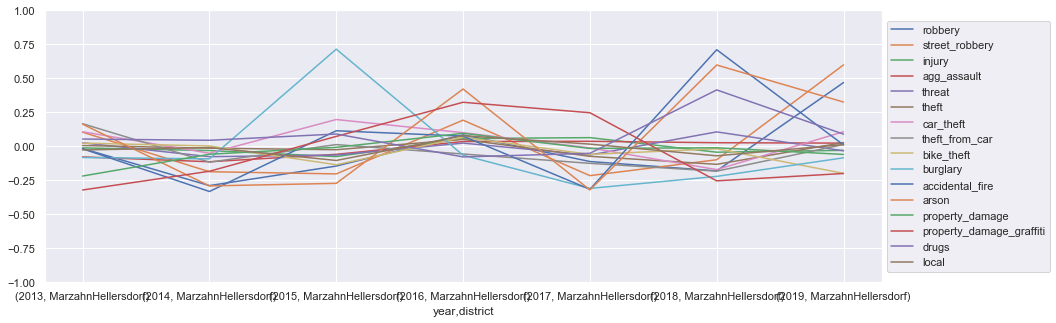

In [113]:
ax = marzah_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [114]:
#Lichtenberg
lichte_crime = data_crime.loc[data_crime["district"]=="Lichtenberg"].reset_index()
lichte_crime = lichte_crime.drop(columns=['index', 'neighborhood']).set_index('year')
lichte_crime_year = lichte_crime.groupby(["year", "district"]).sum()
lichte_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Lichtenberg,1346,539,11830,2754,3890,62467,2142,11308,7809,3267,1432,541,16397,3885,1861,29295
2013,Lichtenberg,1436,655,11223,2310,3759,63069,3072,11615,7295,3258,1619,756,14214,2845,2227,28785
2014,Lichtenberg,1080,661,11362,2408,3771,65128,3287,12608,8649,3067,1131,493,12549,2730,2114,27142
2015,Lichtenberg,1048,539,11225,2548,2906,61866,3197,9617,8756,3949,710,267,11949,2313,2281,26753
2016,Lichtenberg,929,568,11962,2591,3800,66930,3561,11291,11099,3433,932,515,11690,2491,2361,27630
2017,Lichtenberg,950,612,12058,2648,3602,59198,2963,9732,8503,2850,857,312,13000,3414,2549,26186
2018,Lichtenberg,823,499,13016,2941,4057,55678,2776,7654,9066,2565,920,390,12474,2933,2812,27585
2019,Lichtenberg,1176,721,13728,3192,4299,55868,2858,7956,8631,1927,1066,481,14258,2831,2819,30766


In [115]:
#Lichtenberg %
lichte_crime_change = lichte_crime_year.pct_change()
lichte_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Lichtenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Lichtenberg,0.066865,0.215213,-0.051310,-0.161220,-0.033676,0.009637,0.434174,0.027149,-0.065821,-0.002755,0.130587,0.397412,-0.133134,-0.267696,0.196668,-0.017409
2014,Lichtenberg,-0.247911,0.009160,0.012385,0.042424,0.003192,0.032647,0.069987,0.085493,0.185607,-0.058625,-0.301421,-0.347884,-0.117138,-0.040422,-0.050741,-0.057078
2015,Lichtenberg,-0.029630,-0.184569,-0.012058,0.058140,-0.229382,-0.050086,-0.027381,-0.237230,0.012371,0.287577,-0.372237,-0.458418,-0.047813,-0.152747,0.078997,-0.014332
2016,Lichtenberg,-0.113550,0.053803,0.065657,0.016876,0.307639,0.081854,0.113857,0.174067,0.267588,-0.130666,0.312676,0.928839,-0.021675,0.076956,0.035072,0.032781
2017,Lichtenberg,0.022605,0.077465,0.008025,0.021999,-0.052105,-0.115524,-0.167930,-0.138075,-0.233895,-0.169822,-0.080472,-0.394175,0.112062,0.370534,0.079627,-0.052262
2018,Lichtenberg,-0.133684,-0.184641,0.079449,0.110650,0.126319,-0.059461,-0.063112,-0.213522,0.066212,-0.100000,0.073512,0.250000,-0.040462,-0.140890,0.103178,0.053425
2019,Lichtenberg,0.428919,0.444890,0.054702,0.085345,0.059650,0.003412,0.029539,0.039456,-0.047981,-0.248733,0.158696,0.233333,0.143017,-0.034777,0.002489,0.115316


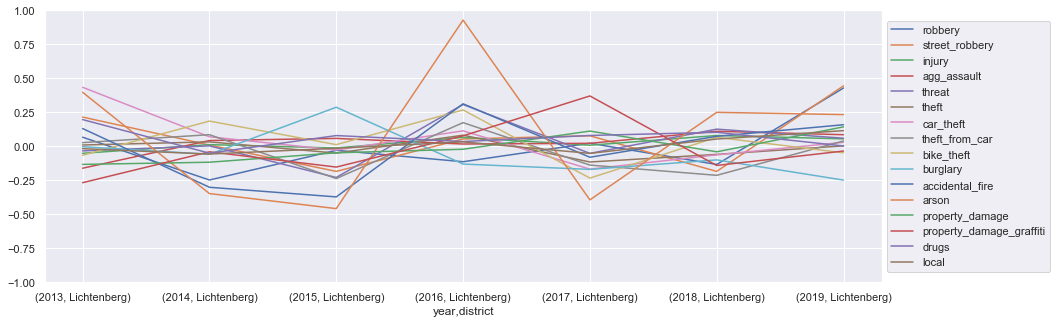

In [116]:
ax = lichte_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [117]:
#Reinickendorf
reini_crime = data_crime.loc[data_crime["district"]=="Reinickendorf"].reset_index()
reini_crime = reini_crime.drop(columns=['index', 'neighborhood']).set_index('year')
reini_crime_year = reini_crime.groupby(["year", "district"]).sum()
reini_crime_year

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Reinickendorf,1510,604,13763,3432,5405,62091,1606,11719,6913,4497,788,221,14957,2560,5202,31713
2013,Reinickendorf,1579,788,12362,2774,5099,61895,1155,11195,5916,4022,775,356,12066,1798,4714,29908
2014,Reinickendorf,1440,700,11254,2611,4698,56025,1419,9889,5684,4494,853,317,11413,2015,3751,29649
2015,Reinickendorf,1382,636,12452,2866,4933,56201,1450,9674,5123,3534,507,210,12208,3753,4019,29357
2016,Reinickendorf,1285,644,12169,2948,5026,57124,1663,8777,5256,3879,689,244,12854,3383,4491,29580
2017,Reinickendorf,970,440,12212,2980,4520,47063,1107,8697,4178,2976,707,273,10840,2592,4209,25022
2018,Reinickendorf,940,405,12109,2839,4956,44554,1416,8358,3970,2815,501,192,10328,1906,3752,25224
2019,Reinickendorf,1016,551,11042,2771,4678,44985,1277,7059,4345,2760,586,242,9874,2062,3834,24394


In [118]:
#Reinickendorf %
reini_crime_change = reini_crime_year.pct_change()
reini_crime_change

,,robbery,street_robbery,injury,agg_assault,threat,theft,car_theft,theft_from_car,bike_theft,burglary,accidental_fire,arson,property_damage,property_damage_graffiti,drugs,local
year,district,,,,,,,,,,,,,,,,
2012,Reinickendorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,Reinickendorf,0.045695,0.304636,-0.101795,-0.191725,-0.056614,-0.003157,-0.280822,-0.044714,-0.144221,-0.105626,-0.016497,0.610860,-0.193287,-0.297656,-0.093810,-0.056917
2014,Reinickendorf,-0.088030,-0.111675,-0.089630,-0.058760,-0.078643,-0.094838,0.228571,-0.116659,-0.039216,0.117355,0.100645,-0.109551,-0.054119,0.120690,-0.204285,-0.008660
2015,Reinickendorf,-0.040278,-0.091429,0.106451,0.097664,0.050021,0.003141,0.021846,-0.021741,-0.098698,-0.213618,-0.405627,-0.337539,0.069657,0.862531,0.071448,-0.009849
2016,Reinickendorf,-0.070188,0.012579,-0.022727,0.028611,0.018853,0.016423,0.146897,-0.092723,0.025961,0.097623,0.358974,0.161905,0.052916,-0.098588,0.117442,0.007596
2017,Reinickendorf,-0.245136,-0.316770,0.003534,0.010855,-0.100676,-0.176126,-0.334336,-0.009115,-0.205099,-0.232792,0.026125,0.118852,-0.156683,-0.233816,-0.062792,-0.154091
2018,Reinickendorf,-0.030928,-0.079545,-0.008434,-0.047315,0.096460,-0.053312,0.279133,-0.038979,-0.049785,-0.054099,-0.291372,-0.296703,-0.047232,-0.264660,-0.108577,0.008073
2019,Reinickendorf,0.080851,0.360494,-0.088116,-0.023952,-0.056094,0.009674,-0.098164,-0.155420,0.094458,-0.019538,0.169661,0.260417,-0.043958,0.081847,0.021855,-0.032905


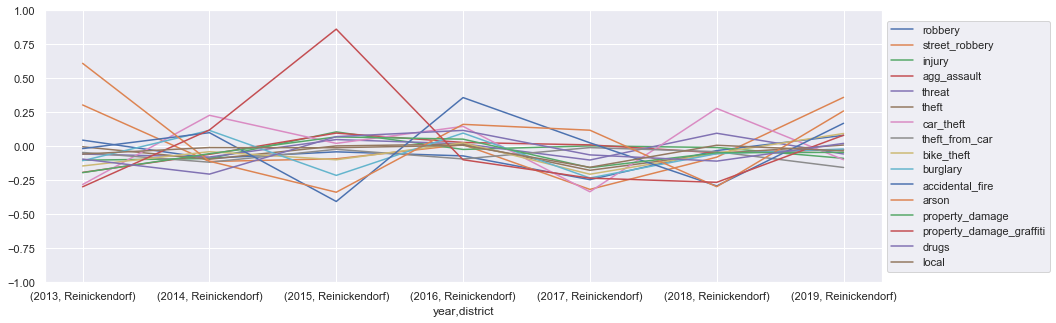

In [119]:
ax = reini_crime_change.plot(figsize=(15,5))
ax.set_ylim(-1, 1)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [120]:
types_freq = pd.read_excel("BerlinCrime_frequency_rearranged.xlsx")
types_freq2 = types_freq.drop(columns=['hood_id', 'neighborhood']) #.set_index('year')
types_freq2

,year,district,type,frequency
0,2012,Mitte,robbery,556
1,2012,Mitte,robbery,709
2,2012,Mitte,robbery,513
3,2012,Mitte,robbery,203
4,2012,Mitte,robbery,310
...,...,...,...,...
17659,2019,Reinickendorf,crime_hood\t,857
17660,2019,Reinickendorf,crime_hood\t,2335
17661,2019,Reinickendorf,crime_hood\t,2449
17662,2019,Reinickendorf,crime_hood\t,2282


In [121]:
types_freq3 = types_freq2.groupby(["district", "year"]).agg({"frequency": "mean"}).reset_index()
types_freq3

,district,year,frequency
0,CharlottenburgWilmersdorf,2012,2089.007353
1,CharlottenburgWilmersdorf,2013,2059.658088
2,CharlottenburgWilmersdorf,2014,1609.569853
3,CharlottenburgWilmersdorf,2015,1760.187500
4,CharlottenburgWilmersdorf,2016,1669.573529
...,...,...,...
91,TreptowKöpenick,2015,692.025000
92,TreptowKöpenick,2016,697.246875
93,TreptowKöpenick,2017,675.609375
94,TreptowKöpenick,2018,647.825000


In [122]:
#population

In [123]:
population = population.rename(columns={"District":"district", "Year":"year", "Population":"population"})
population.head()

,district,year,population
0,Charlottenburg-Wilmersdorf,2012,319289.0
1,Charlottenburg-Wilmersdorf,2013,322870.0
2,Charlottenburg-Wilmersdorf,2014,326354.0
3,Charlottenburg-Wilmersdorf,2015,330468.0
4,Charlottenburg-Wilmersdorf,2016,336249.0


In [124]:
types_freq4 = types_freq3.merge(population, how ="inner", on=["year", "district"])
types_freq4.head()

,district,year,frequency,population
0,Lichtenberg,2012,772.899038,260505.0
1,Lichtenberg,2013,760.278846,264858.0
2,Lichtenberg,2014,760.480769,268465.0
3,Lichtenberg,2015,720.788462,275142.0
4,Lichtenberg,2016,777.802885,283121.0


In [125]:
data_demo1.sort_values("District").head(10)

,Citizenship,Year,Sex,Age,District,Population
1300,German,2012,male,below 10,Charlottenburg-Wilmersdorf,10619.0
1437,German,2018,female,70 to 79,Charlottenburg-Wilmersdorf,18009.0
1438,German,2018,female,80 to 89,Charlottenburg-Wilmersdorf,9303.0
1439,German,2018,female,90 plus,Charlottenburg-Wilmersdorf,2560.0
1580,Foreigner,2018,male,below 10,Charlottenburg-Wilmersdorf,2270.0
1581,Foreigner,2018,male,10 to 19,Charlottenburg-Wilmersdorf,2272.0
1582,Foreigner,2018,male,20 to 29,Charlottenburg-Wilmersdorf,8078.0
1583,Foreigner,2018,male,30 to 39,Charlottenburg-Wilmersdorf,9514.0
1584,Foreigner,2018,male,40 to 49,Charlottenburg-Wilmersdorf,7769.0
1585,Foreigner,2018,male,50 to 59,Charlottenburg-Wilmersdorf,6105.0


In [126]:
#CREATE BAR STACKED CHART FOR CRIMES TOTAL SPLITTED BY CRIME TYPES + INCLUDE LINE FOR TOTAL CRIMES, Tableau

In [130]:
types_freq4 = sm.add_constant(types_freq4)

In [131]:
lin_reg = sm.OLS(types_freq4["frequency"],
                 types_freq4[["const", "population"]])

In [132]:
result = lin_reg.fit()

In [133]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     9.939
Date:                Fri, 10 Jul 2020   Prob (F-statistic):            0.00285
Time:                        09:51:24   Log-Likelihood:                -347.17
No. Observations:                  48   AIC:                             698.3
Df Residuals:                      46   BIC:                             702.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.4342    268.823      0.511      0.612    -403.679     678.547
population     0.0027      0.001      3.153      0.003       0.001       0.004
==============================================================================
Omnibus:                        8.345   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.528
Skew:                           0.925   Prob(JB):                       0.0232
Kurtosis:                       3.587   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""